# Ejercicio 2

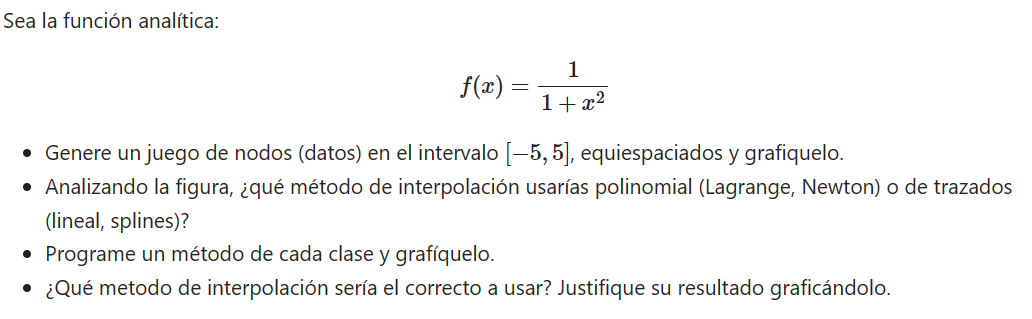

## Iterpolación de lagrange

El resultado de la interpolación en el punto -5.0 es 0.038461538461538464
El resultado de la interpolación en el punto -4.0 es 0.058823529411764705
El resultado de la interpolación en el punto -3.0 es 0.1
El resultado de la interpolación en el punto -2.0 es 0.2
El resultado de la interpolación en el punto -1.0 es 0.5
El resultado de la interpolación en el punto 0.0 es 1.0
El resultado de la interpolación en el punto 1.0 es 0.5
El resultado de la interpolación en el punto 2.0 es 0.2
El resultado de la interpolación en el punto 3.0 es 0.1
El resultado de la interpolación en el punto 4.0 es 0.058823529411764705
El resultado de la interpolación en el punto 5.0 es 0.038461538461538464


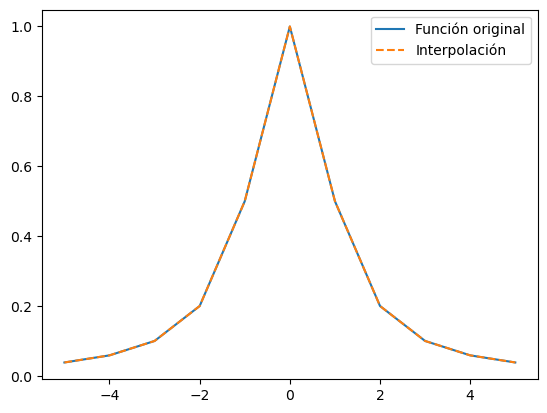

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def legendre(dataxs, x):
    n = dataxs.size
    l = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            l[k] *= ((x - dataxs[j]) / (dataxs[k] - dataxs[j]))
    return l

def general(dataxs, datays, l, x):
    k = np.where(x == dataxs)[0]
    if k.size == 0:
        val = np.sum(datays * l)
    else:
        val = datays[k[0]]
    return val

func = lambda x: 1/(1+x**2)

# Definimos 11 puntos de -5 a 5 y se evalua la función en los puntos
dataxs = np.linspace(-5,5,11) 
datays = func(dataxs)

# Calculamos los coeficientes de Lagrange para los puntos generados y cada valor de x.
l_values = [legendre(dataxs, x) for x in dataxs]

# Calculamos el valor de la interpolación de Lagrange para cada valor de x.
pofx_values = [general(dataxs, datays, l, x) for l, x in zip(l_values, dataxs)]

# Imprimimos el resultado de cada interpolación en cada punto
for i, pofx in enumerate(pofx_values):
    print(f"El resultado de la interpolación en el punto {dataxs[i]} es {pofx}")

# Graficamos la función original
plt.plot(dataxs, func(dataxs), label='Función original')

# Graficamos la interpolación
plt.plot(dataxs, pofx_values, '--', label='Interpolación')

# Agregamos una leyenda
plt.legend()

# Mostramos la gráfica
plt.show()


## Interpolación spline cúbico

El resultado de la interpolación en el punto -5.0 es 0.038461538461538464
El resultado de la interpolación en el punto -4.0 es 0.058823529411764705
El resultado de la interpolación en el punto -3.0 es 0.1
El resultado de la interpolación en el punto -2.0 es 0.2
El resultado de la interpolación en el punto -1.0 es 0.5
El resultado de la interpolación en el punto 0.0 es 1.0
El resultado de la interpolación en el punto 1.0 es 0.5
El resultado de la interpolación en el punto 2.0 es 0.2
El resultado de la interpolación en el punto 3.0 es 0.1
El resultado de la interpolación en el punto 4.0 es 0.058823529411764705
El resultado de la interpolación en el punto 5.0 es 0.038461538461538464


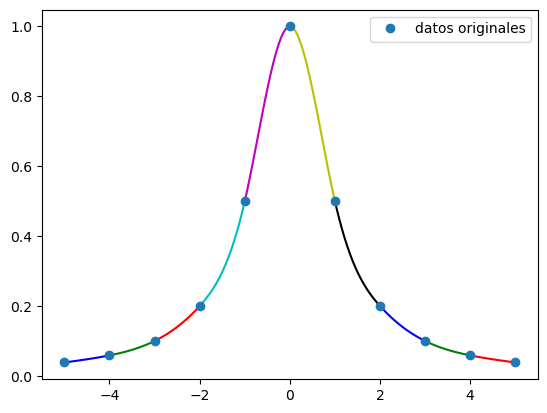

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def computecs(dataxs,datays):
    n = dataxs.size
    A = np.zeros((n-2, n-2))
    np.fill_diagonal(A, 2*(dataxs[2:]-dataxs[:-2]))
    np.fill_diagonal(A[1:,:], dataxs[2:-1]-dataxs[1:-2])
    np.fill_diagonal(A[:,1:], dataxs[2:-1]-dataxs[1:-2])
    b1 = (datays[2:]-datays[1:-1])/(dataxs[2:]-dataxs[1:-1])
    b2 = (datays[1:-1]-datays[:-2])/(dataxs[1:-1]-dataxs[:-2])
    bs = 6*(b1 - b2)
    cs = np.zeros(n)
    cs[1:-1] = np.linalg.solve(A, bs)
    return cs

def splineinterp(dataxs,datays,cs,x):
    k = np.argmax(dataxs>x)
    xk = dataxs[k]; xk1 = dataxs[k-1]
    yk = datays[k]; yk1 = datays[k-1]
    ck = cs[k]; ck1 = cs[k-1]
    val = yk1*(xk-x)/(xk-xk1) + yk*(x-xk1)/(xk-xk1)
    val -= ck1*((xk-x)*(xk-xk1) - (xk-x)**3/(xk-xk1))/6
    val -= ck*((x-xk1)*(xk-xk1) - (x-xk1)**3/(xk-xk1))/6
    return val

# Definimos la misma función que en el código anterior
func = lambda x: 1/(1+x**2)

# Definimos 11 puntos de -5 a 5 y se evalua la función en los puntos
dataxs = np.linspace(-5,5,11) 
datays = func(dataxs)

# Se calculan los coeficientes del spline cúbico
cs = computecs(dataxs, datays)

# Resultados
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(dataxs)-1):
    xi = np.linspace(dataxs[i], dataxs[i+1], 100)
    yi = [splineinterp(dataxs, datays, cs, x_val) for x_val in xi]
    plt.plot(xi, yi, colors[i % len(colors)])

# Graficar los puntos de datos originales
plt.plot(dataxs, datays, 'o', label='datos originales')

# Imprimir los resultados de la interpolación en cada punto
for i, x_val in enumerate(dataxs):
    pofx = splineinterp(dataxs, datays, cs, x_val)
    print(f"El resultado de la interpolación en el punto {x_val} es {pofx}")

plt.legend()
plt.show()

### ¿Qué metodo de interpolación sería el correcto a usar? Justifique su resultado graficándolo.
El método adecuado como se puede observar es la interpolación de trazados o splines